In [8]:
import numpy as np
#from mpl_toolkits.mplot3d import axes3d (no longer needed as import in newer versions of mathplotlib)
import matplotlib.pyplot as plt

### Gradient Function

- The gradient of a multivariable funtion points in the steepest ascent.  The gradient of a two dimensional function also gives an answer in two dimensions as a vector that points in the direction of the steepest ascent.  Calculating the gradients over the entire input dimensional space for the function (where it is defined) will result in the vector field for the function.

- The graident represents all the partial derivatives of a multivariable function.

- You can also think of the gradient as pointing toward the local maxima of a function (and pointing away from local minima.

Using this function as an example:

$f(x,y)=x^2\sin^3 y + 2{y^3\over \sqrt{x}}$

$\nabla f = (f_x, f_y)$

In [9]:
# a function to analytically determine the gradient given the x,y point for the function above, returned as a tuple
def gradf(x,y):
    grad_xy = ()
    if x > 0:
        ddx = 2*x*(np.sin(y)**3) - (y**3)*(x**(-3/2))
        ddy = 3*(x**2)*(np.sin(y)**2)*(np.cos(y)) + 6*(y**2)*(x**(-1/2))
        grad_xy = (ddx, ddy)
    else:
        print("x must be a positive number")
    return(grad_xy)

In [10]:
gradf(2,np.pi)

(np.float64(-10.962374249993157), np.float64(41.87318519783328))

- looking at the numerical solution using the central difference formula

$f_x(a,b) \approx {{f(a+h,b)-f(a,b)\over h} \,\,\, + \,\,\, {f(a,b)-f(a-h,b)\over h} \over 2} = {f(a+h,b)-f(a-h,b)\over 2 h}$

In [11]:
# a function to calculate the gradient numerically using the central difference formula

def f(x,y):
    f = (x**2)*(np.sin(y)**3) + 2*(y**3)*(x**(-1/2))
    return(f)

def gradfnum(x,y,h):
    cent_diff = ()
    x1 = x+h
    x2 = x-h
    y1 = y+h
    y2 = y-h
    if x >0:
        dfx = (f(x1,y) - f(x2,y)) / (2*h)
        dfy = (f(x,y1) - f(x,y2)) / (2*h)
        cent_diff = (dfx,dfy)
    else:
        print("x is not greater than 0")
    return(cent_diff)

In [12]:
gradfnum(2,np.pi,h=1e-5)

(np.float64(-10.962374249956495), np.float64(41.87318519761618))

In [13]:
# generalizing the analytic solution to any function for the gradient of f

def grad(f,x,y,h):
    partial_x = (f(x+h, y) - f(x-h, y))/(2*h)
    partial_y = (f(x, y+h) - f(x, y-h))/(2*h)
    cd = (partial_x, partial_y)
    return cd
    

In [14]:
grad(lambda x,y: x**2 *y, 2,-3, 1e-4)

(-12.000000000016442, 4.000000000008441)

### The Directional Derivative

- The directional derivative gives the rate of change of a multivariable function, f, in the direction of a unit vector at point, a.  
- Intuitively, starting from a point in the vector space of a function, depending on which direction you are facing (similar to standing on the side of a hill), there will be a different slope.  

$D_{{\vec{v}\over \|\vec{v}\|}}f(x,y) = \langle f_x(x,y) , f_y(x,y) \rangle \cdot {\vec{v}\over \|\vec{v}\|}$

In [15]:
# calculating the directional derivative numerically, using the central difference theorem again

def DDeriv(f,x,y,h,v):
    partial_x = (f(x+h, y) - f(x-h, y))/(2*h)
    partial_y = (f(x, y+h) - f(x, y-h))/(2*h)
    left = (partial_x, partial_y)
    right = v/np.linalg.norm(v)
    return np.dot(left, right)

In [16]:
DDeriv(f = lambda x,y: x**2+y**2+2, x=0.4, y=-0.2, h=1e-5, v=(0.6,0.8))

np.float64(0.16000000000904172)

### Visualizing the gradient, directional directives, and countour

Given the function: $f(x,y) = \left(1 - \frac{x}{2} + x^5 + y^3\right) e^{-x^2 - y^2}$

Text(0.5, 0, 'z')

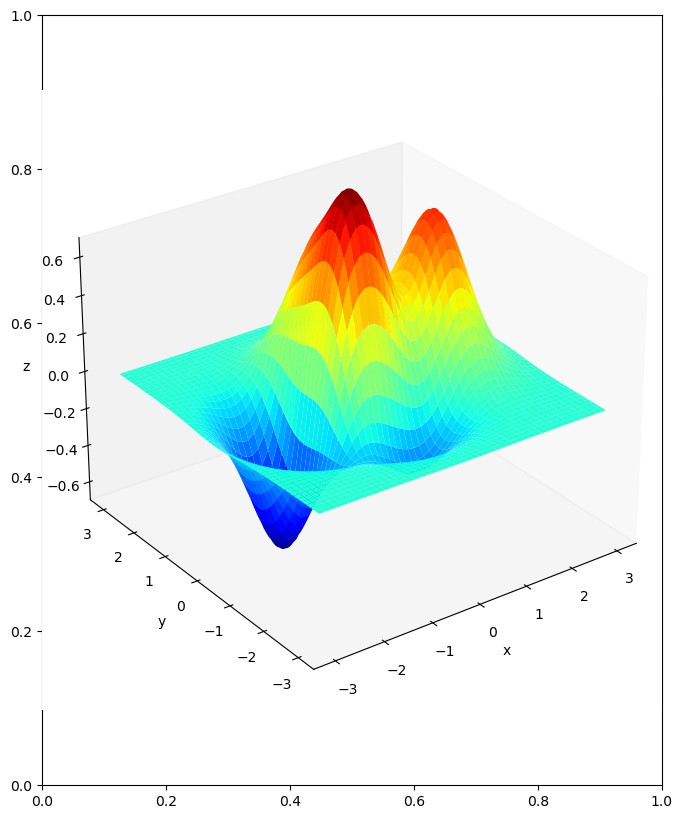

In [17]:
# Showing a 3D plot for the function, along with the contour plot and vector fields to visualize the above concepts
# Note, the gradient is orthoganol to the countour curves and the heatmap shows local min and max

def f2(x,y):
    z = (1 - x/2 + x**5 + y**3)*(np.exp(-x**2 - y**2))
    return z

x1 = -3; x2 = 3
y1 = -3; y2 = 3 
N = 100

x = np.linspace(x1, x2, N)
y = np.linspace(y1, y2, N)

X, Y = np.meshgrid(x,y)

Z = f2(X,Y)

fig1, ax1 = plt.subplots(1, 1, figsize = (8,10))
ax1 = plt.axes(projection='3d')

ax1.plot_surface(X,Y,Z,cmap='jet')
ax1.view_init(28, -126)
ax1.grid(False)
ax1.set_zlim(-.7, .7)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

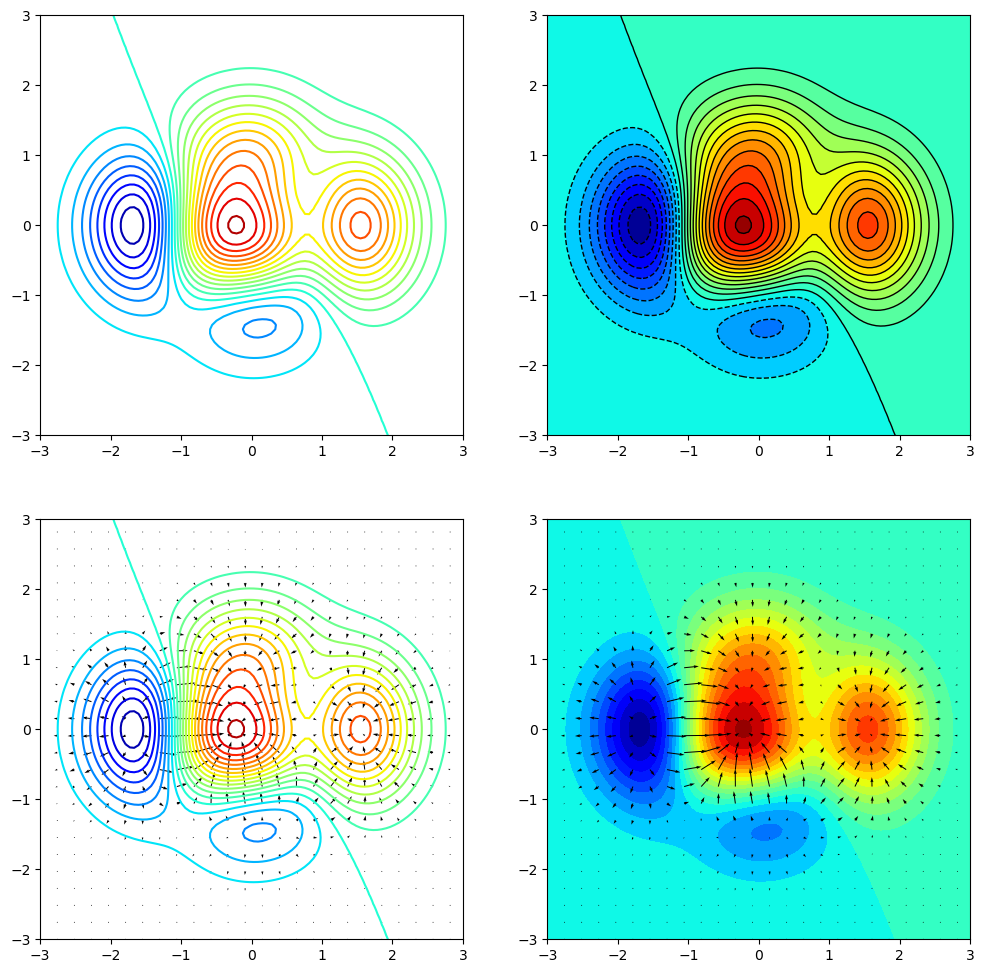

In [18]:
skip=(slice(None,None,4),slice(None,None,4))
V, U = np.gradient(Z)


fig2, ax2 = plt.subplots(2, 2, figsize = (12,12))
ax2[0][0].contour(X,Y,Z,levels=25,cmap='jet')
ax2[0][1].contourf(X,Y,Z,levels=25,cmap='jet')
ax2[0][1].contour(X,Y,Z, levels=25,colors='black', linewidths = 1)
ax2[1][0].contour(X,Y,Z,levels=25,cmap='jet')
ax2[1][0].quiver(X[skip], Y[skip], U[skip], V[skip], color='black', scale = 2)
ax2[1][1].contourf(X,Y,Z,levels=25,cmap='jet')
ax2[1][1].quiver(X[skip], Y[skip], U[skip], V[skip], color='black', scale = 2)


### Gradient Descent 

- Putting together the concepts of directional derivative and gradients, we can start from a given point or intial guess) in our vector space (definted by multivariable function f) to iteratively find the local minimum.  
- As before, the function must be differentiable 
- It is possible to get stuck in an infinite loop if there is a fail to converge, so a maximum number of iterations can be specified
- Alpha, or the learning rate, is the size of the "step" at each iteration.
- As before, this can be computated numerically using the central difference theorem
- As you approach a local minimum, the distance between $x_i+1 and x_i$ will get smaller and smaller.  You need to define a tolerance for this difference to accept the solution


In [19]:
# first, define two functions to (f_x and f_y) to get the partial derivates of the function f (taken as argument g) 
# at point x0 and y0 (taken as arguments x and y).  This uses the central difference formula
# next, the function run_GD uses the partial derivates calculated above to run a gradient descent method.  
# This function takes the arguments f (a differentiable function in two variables), a starting point x0 and y0, the learning rate
# alpha, the acceptable toleraance, tol, and the maximum number of allowable iterations before stopping just in case there is a
# fail to converge, max_iters

def f_x(g,x,y,h):
    dx = (g(x+h, y) - g(x-h, y))/(2*h)
    return dx
def f_y(g,x,y,h):
    dy = (g(x, y+h) - g(x, y-h))/(2*h)
    return dy
    
def run_GD(f, x0, y0, alpha, tol, max_iters):
    h= 1e-5
    i=0
    min=()
    while i <= max_iters:
        partial_x = f_x(f,x0,y0,h)
        partial_y = f_y(f,x0,y0,h)
        xi = x0 - alpha*partial_x
        yi = y0 - alpha*partial_y
        diff = np.sqrt((xi-x0)**2 + (yi-y0)**2)
        min = (xi,yi)
        x0=xi
        y0=yi
        i+=1
        if diff<tol:
            break 
    return min

In [20]:
run_GD(lambda x,y: x**2 + y**2, -2, .25, alpha = .001, tol=1e-5, max_iters=1e4)

(-0.004947579429618214, 0.0006184474287038154)